In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D,MaxPool2D,ZeroPadding2D,Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
img_height = 64
img_width = 64

In [4]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)


In [5]:
train_data_generator = datagen.flow_from_directory(directory='F:\DATA SECIENCE PROJECTS\DEEP LEARNING\malaria disease detection\model\Dataset\Train', target_size=(img_height,img_width),class_mode='binary',batch_size=16,subset='training')

Found 333 images belonging to 2 classes.


In [6]:
validation_data_generator = datagen.flow_from_directory(directory='F:\DATA SECIENCE PROJECTS\DEEP LEARNING\malaria disease detection\model\Dataset\Test',
                                                   target_size=(img_height,img_width),
                                                   class_mode='binary',
                                                   batch_size=16,
                                                   subset='validation')

Found 26 images belonging to 2 classes.


In [7]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [10]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=train_data_generator,
                             steps_per_epoch=len(train_data_generator),
                             epochs=5,
                             validation_data=validation_data_generator,
                             validation_steps = len(validation_data_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 2 steps
Epoch 1/5
21/21 [==============================] - 5s 249ms/step - loss: 0.7192 - accuracy: 0.5706 - val_loss: 0.7028 - val_accuracy: 0.3462
Epoch 2/5
21/21 [==============================] - 1s 67ms/step - loss: 0.6643 - accuracy: 0.5826 - val_loss: 0.7157 - val_accuracy: 0.3846
Epoch 3/5
21/21 [==============================] - 1s 67ms/step - loss: 0.6171 - accuracy: 0.6757 - val_loss: 0.7067 - val_accuracy: 0.4615
Epoch 4/5
21/21 [==============================] - 1s 68ms/step - loss: 0.5707 - accuracy: 0.6847 - val_loss: 0.8020 - val_accuracy: 0.4615
Epoch 5/5
21/21 [==============================] - 1s 67ms/step - loss: 0.5466 - accuracy: 0.7267 - val_loss: 0.6480 - val_accuracy: 0.6923


In [20]:
y_pred = model.predict(validation_data_generator)
y_pred

array([[0.52406317],
       [0.4979007 ],
       [0.4504396 ],
       [0.47800416],
       [0.5284194 ],
       [0.42042184],
       [0.25395155],
       [0.25005716],
       [0.25730526],
       [0.31860328],
       [0.55617565],
       [0.60923034],
       [0.2851846 ],
       [0.4523647 ],
       [0.39124653],
       [0.38970265],
       [0.48917866],
       [0.5846695 ],
       [0.31096786],
       [0.5347213 ],
       [0.5811248 ],
       [0.53080016],
       [0.48485386],
       [0.35630152],
       [0.41899532],
       [0.4353054 ]], dtype=float32)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img

In [14]:
from tensorflow.keras.models import load_model


In [15]:
model = load_model('maleria_detection.h5')

In [32]:
img = load_img('dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_9.png', target_size=(64,64))

In [48]:
X = img_to_array(img)/255.0
X


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [49]:
import matplotlib.pyplot as plt

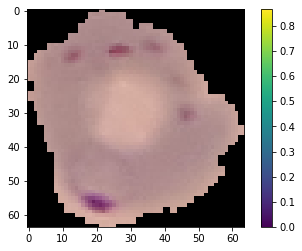

In [50]:
plt.figure()
plt.imshow(X)
plt.colorbar()

In [51]:
X.shape

(64, 64, 3)

In [54]:
import numpy as np
np.max(X), np.min(X)

(0.8666667, 0.0)

In [40]:
X = X.reshape((1,)+X.shape)

In [41]:
model.predict(X)

array([[0.506833]], dtype=float32)

In [42]:
img5 = load_img('dataset/Test/Uninfected/.png', target_size=(64,64))

In [56]:
X1 = img_to_array(img5)/255.0


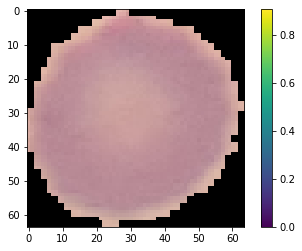

In [57]:
plt.figure()
plt.imshow(X1)
plt.colorbar()

In [44]:
model.predict(X1)

array([[0.59435046]], dtype=float32)

In [58]:
valdidation_datagen = ImageDataGenerator(rescale=1/255.0)